<a href="https://colab.research.google.com/github/ydvgaurav1/Play-Store-App-Review-Analysis/blob/main/Individual_Notebook_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Play Store App Review Analysis**

## **Introduction**

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

The tools that are going to be used for this EDA would be numpy, pandas, matplotlib and seaborn which I have learnt from the course.

###In this Notebook, I am going to analyse the dataset (taken from Almabetter Capstone Project) of all the Apps in the Google Play Store

###The series of steps followed are :

* Importing Packages

* Reading Data

* Data Cleaning

      1. Handling NULL Values

      2. Handling DataTypes and Values

* Analyzing Data

* Furthur Analysis.




Let's take a look at the data, which consists of two files:



*   **play_store _data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.
*   **user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.





# **1.   Importing Packages**



In [185]:
#importing important packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



# **2.   Reading Data**



In [186]:
#Reading our two different datasets(.csv file)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
df_app=pd.read_csv("/content/drive/MyDrive/1st Capstone Project: Play Store App Review Analysis/csv file/Play Store Data.csv")
df_review=pd.read_csv("/content/drive/MyDrive/1st Capstone Project: Play Store App Review Analysis/csv file/User Reviews.csv")

In [188]:
#printing the first 5 data
df_app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [189]:
#printing the bottom 5 data
df_app.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [190]:
#informatiom about the data frame
df_app.info()
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

In [191]:
#Dimension of the data data frame
app_shape=df_app.shape
review_shape=df_review.shape
print( app_shape)
print( review_shape)

(10841, 13)
(64295, 5)




#**3. Data Cleaning**



When it comes to data, there are many different sorts of quality issues, which is why data cleaning is one of the most time-consuming aspects of data analysis.

Missing data, duplicated rows, spelling discrepancies, and so on could all be present. These difficulties could make data analysis difficult, resulting in inaccuracies or inappropriate results. As a result, these issues must be addressed before data can be analyzed.

So, first of all , I will check for **NaN** values in both the Dataframes 

In [192]:
#Fetching the number of null values
print(df_app.isnull().sum())
print(df_review.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


As we can see, both dataframes have some null values(Rating,Type,Content Rating ,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity.)

Also,Rating column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.

The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

My goal is to remove all null values in order to get more precise data. 

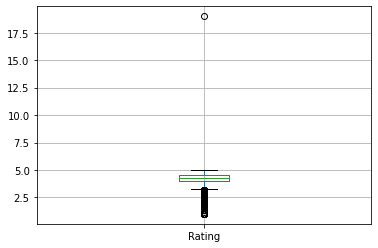

In [193]:
#Distibution of rating and detectection of outlier using boxplot
df_app.boxplot();

We know that the rating of any app in the play store will be in between 1 and 5 and from the above boxplot, we are getting values more than 5 which is an outlier.
So, my goal is to remove that outlier.

In [194]:
#Checking the outlier from Rating column
df_app[df_app["Rating"]>5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Since we have only one outlier, we can remove it through indexing

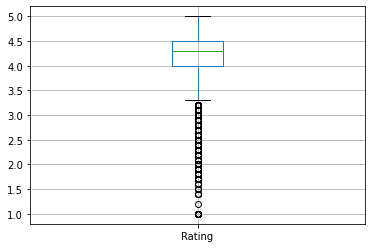

In [195]:
#Removing the outlier from Rating column
df_app.drop([10472],inplace=True)
df_app.boxplot();



We can see that outlier has been removed and from the boxplot.

Now, we will impute the NaN values in the Rating column with its mode.

In [196]:
# Replacing the NaN values in the 'Rating' colunm with its mode value
mode_value_rating = df_app.Rating.mode()
df_app['Rating'].fillna(value={'Rating':mode_value_rating},inplace=True)


In [156]:
#Removing other null values(smaller %) frome both datasets
df_app.dropna(inplace=True)
df_review.dropna(inplace=True)

In [197]:
#Checking for null values after cleaning
print(df_app.isnull().sum())
print(df_review.isnull().sum())


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


All the null values has been removed.

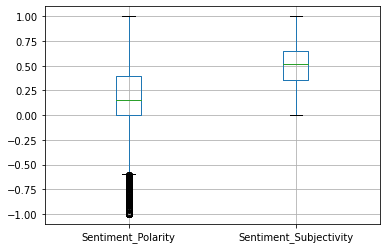

In [198]:
#Boxplot for user_review.csv dataset
df_review.boxplot();

From the above two boxplots,we can see that:

**Average Rating: 4.3**

**Average Sentiment_Polarity: 0.15**

**Average Sentiment_Subjectivity: 0.51**



##    **. Data Manipulation**



My analysis basically involves columns like App,Installs,price,size,reviews, etc. from which we will visualise some useful information.

Considering these columns, we have to manipulate the data as per our need in the given Dataframes.

First of all, we will start with removing **duplicate** values. 

In [199]:
#Checking for duplicates values.
df_app['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [200]:
df_app[df_app['App']=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [201]:
#Dropping all duplicate values
df_app.drop_duplicates(subset = 'App', inplace = True)

In [202]:
#Cross-checking if any duplicate vaue is left
df_app[df_app['App']=='ESPN']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


We can see that the duplicates values have been sucessfully removed.

My next goal is to change the datatype of the Last Updated column from string to datetime.

In [203]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
df_app["Last Updated"] = pd.to_datetime(df_app['Last Updated'])
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Now, we have to change the datatype of the Price column from string to float.



In [204]:
df_app['Price'].value_counts()

0          8903
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

While going through the dataset, I got some '$'sign in the price column. So, before changing the datatype of the Price column from string to float, first we have to remove **dollar** sign.

In [205]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [206]:
# The drop_dollar funtion applied to the price column
df_app['Price']=df_app['Price'].apply(lambda x: convert_dollar(x))
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [207]:
df_app[df_app['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


We have successfully converted the datatype of values in the Price column from string to float.

Again, we have to convert the values in the Installs column from string datatype to integer datatype.

In [208]:
# Checking the contents of the 'Installs' column
df_app['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

We can see that here also '+' and ',' signs are present.So, before changing the datatype of the Installs column from string to integer, first we have to remove plus and comma sign.

In [209]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [210]:
# The drop_plus funtion applied to the main dataframe
df_app['Installs'] = df_app['Installs'].apply(lambda x: convert_plus(x))
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


The resultant values in the Installs column are of the integer datatype, and it represents the least number of times a particular app has been installed

Again, we have to convert the values in the Size column from string datatype to integer datatype.

But we have so many special characters like 'K','M' and '.'. So we have to remove these signs first and convert it to integer.

To replace 'M', we will multiply the value by 1000000 and for 'k', we will multiply by 1000.


In [211]:
#Removing special Character from Size column
df_app['Size']=df_app.Size.apply(lambda x: x.strip('+'))
df_app['Size']=df_app.Size.apply(lambda x: x.replace('.',''))
df_app['Size']=df_app.Size.apply(lambda x: x.replace('M','e+6'))
df_app['Size']=df_app.Size.apply(lambda x: x.replace('k','e+3'))

In [212]:
df_app['Size'].value_counts()

Varies with device    1227
12e+6                  222
11e+6                  214
14e+6                  213
13e+6                  212
                      ... 
430e+3                   1
429e+3                   1
200e+3                   1
460e+3                   1
619e+3                   1
Name: Size, Length: 370, dtype: int64

As we can see that there are lot of values with 'varies with device'. So, first of all we will assing Nan values and then we can drop the null values.We have to do something with those set of Nan values data. It will be a better idea to drop the Rows of the column Size having Nanvalues because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.



In [213]:
#Assinging NaN values to row with value " varies with device "
df_app['Size']=df_app.Size.replace('Varies with device',np.NaN)

In [214]:
#Dropping NaN values of size column
df_app.dropna(subset=['Size'],inplace=True)

In [216]:
# Converting the datatype of the values in the size column from string to int
df_app['Size'] = pd.to_numeric(df_app['Size'])
df_app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


We have successfully converted the datatype of values in the Size column from string to numeric value.

One last step in Data Manipulation is to convert the datatype of values in the Reviews column from string to int.

In [217]:
# Checking the contents of the 'Reviews' column
df_app['Reviews'].value_counts()

0         554
1         268
2         211
3         168
4         133
         ... 
136626      1
49190       1
64713       1
216388      1
398307      1
Name: Reviews, Length: 4304, dtype: int64

In [218]:
# Converting the datatype of the values in the reviews column from string to int
df_app['Reviews'] = df_app['Reviews'].astype(int)
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


We have successfully converted the datatype of the values in the Reviews column from string to int.

In [219]:
df_app.describe()

,Rating,Reviews,Size,Installs,Price
count,7027.000000,8.432000e+03,8.432000e+03,8.432000e+03,8432.000000
mean,4.160623,1.206553e+05,3.862137e+07,3.724212e+06,1.225972
std,0.559145,9.363450e+05,2.497218e+07,2.482940e+07,18.028685
min,1.000000,0.000000e+00,1.100000e+04,0.000000e+00,0.000000
25%,4.000000,1.700000e+01,1.900000e+07,1.000000e+03,0.000000
50%,4.300000,4.755000e+02,3.200000e+07,5.000000e+04,0.000000
75%,4.500000,1.566725e+04,5.400000e+07,1.000000e+06,0.000000
max,5.000000,4.489172e+07,1.000000e+08,1.000000e+09,400.000000




# **4. Analyzing Data**




## **.Analyzing the Categories Column**






In [220]:
#Getting  values of  different category
df_app['Category'].value_counts()

FAMILY                 1726
GAME                    873
TOOLS                   731
BUSINESS                376
MEDICAL                 368
PERSONALIZATION         351
LIFESTYLE               334
FINANCE                 299
PRODUCTIVITY            291
SPORTS                  285
COMMUNICATION           242
HEALTH_AND_FITNESS      232
PHOTOGRAPHY             222
NEWS_AND_MAGAZINES      201
BOOKS_AND_REFERENCE     194
SOCIAL                  189
TRAVEL_AND_LOCAL        173
SHOPPING                168
DATING                  159
VIDEO_PLAYERS           127
MAPS_AND_NAVIGATION     107
EDUCATION                89
FOOD_AND_DRINK           88
LIBRARIES_AND_DEMO       81
AUTO_AND_VEHICLES        75
ENTERTAINMENT            64
HOUSE_AND_HOME           62
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  56
PARENTING                54
COMICS                   49
BEAUTY                   47
Name: Category, dtype: int64

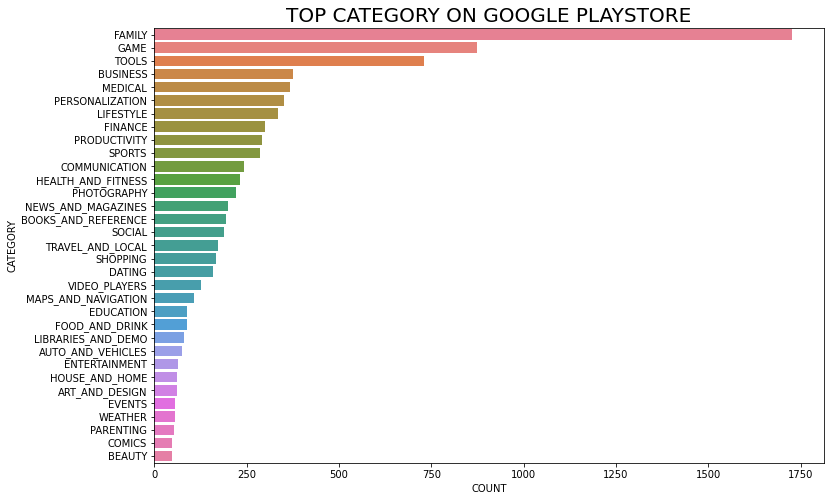

In [221]:
#Let's visualise the Category column
x=df_app['Category'].value_counts()
y=df_app['Category'].value_counts().index
xaxis=[]
yaxis=[]
for i in range(len(x)):
  xaxis.append(x[i])
  yaxis.append(y[i])

plt.figure(figsize=(12,8))
plt.xlabel("COUNT")
plt.ylabel("CATEGORY")
graph=sns.barplot(x=xaxis,y=yaxis,palette="husl")
graph.set_title("TOP CATEGORY ON GOOGLE PLAYSTORE",fontsize=20);



There are total 33 categories from the above dataset and we can come on the conclusion that most of the applications used falls in  category **family**,**game** and **tools** and the least number of applications falls under category **parenting**,**events** and **beauty**.

## **Analyzing Free and Paid apps**

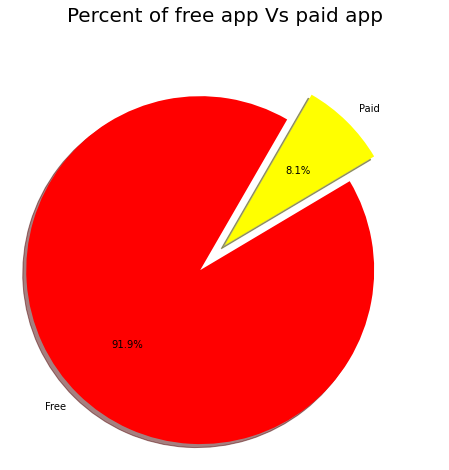

In [222]:
#Let us visualise the paid and free app
plt.figure(figsize=(12,8))
labels=df_app['Type'].value_counts(sort=True).index
sizes=df_app['Type'].value_counts(sort=True)
plt.pie(sizes,explode=(0.2,0),labels=labels,colors=["red","yellow"],autopct='%1.1f%%',shadow=True,startangle=60)
plt.title('Percent of free app Vs paid app',size=20)
plt.show()

From the above pie chart, we can see that 92.6% of the apps are **free** and 7.4% of the apps are **paid**. 

## **Analyzing the Price coumn**

In this particular analysis, we will compare the price with different categories of the applications.

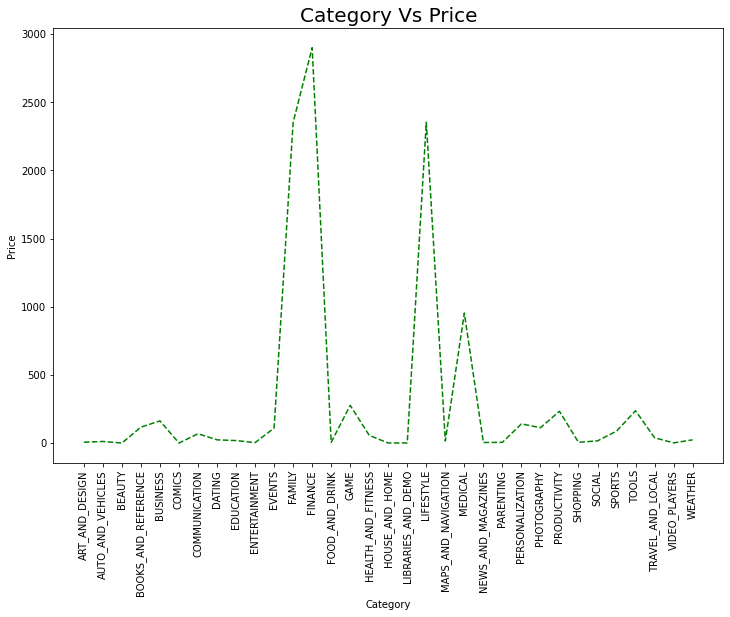

In [232]:
#Visualising the price with different category of applications
grp=df_app.groupby('Category')
y=grp['Price'].agg(np.sum)
plt.figure(figsize=(12,8))
plt.plot(y,'r--',color='g')
plt.xticks(rotation=90)
plt.title('Category Vs Price',size=20)
plt.xlabel('Category')
plt.ylabel('Price');

From above plot, we can conclude that **Finance** category applications has higher prices compared to others.

## **Analyzing the Size and Rating Column**

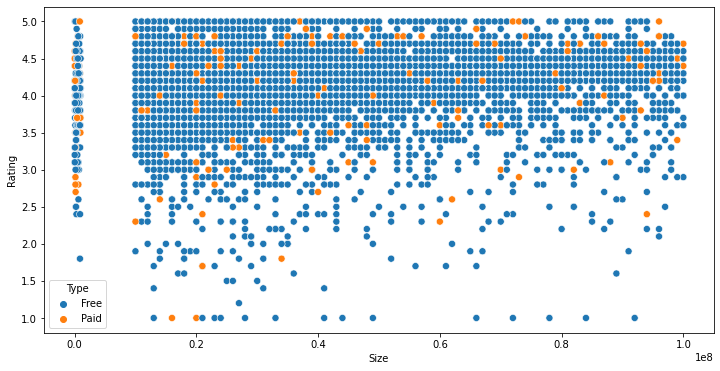

In [263]:
#Distribution of apps in term of their rating, size and type
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_app['Size'],y=df_app['Rating'],hue=df_app['Type'],s=50)
plt.show()


From this scatter plot, we can imply that majority of the **free** apps are small in size and having high rating. While for **paid** apps, we have quite equal distribution in term on size and rating.

## **Correlation Heatmap Analysis**

In [ ]:
# Finding correlation between different columns in the play store data
df_app.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055076,0.039546,0.040131,-0.021215
Reviews,0.055076,1.000000,0.091116,0.624050,-0.007791
Size,0.039546,0.091116,1.000000,0.048040,-0.011261
Installs,0.040131,0.624050,0.048040,1.000000,-0.009656
Price,-0.021215,-0.007791,-0.011261,-0.009656,1.000000


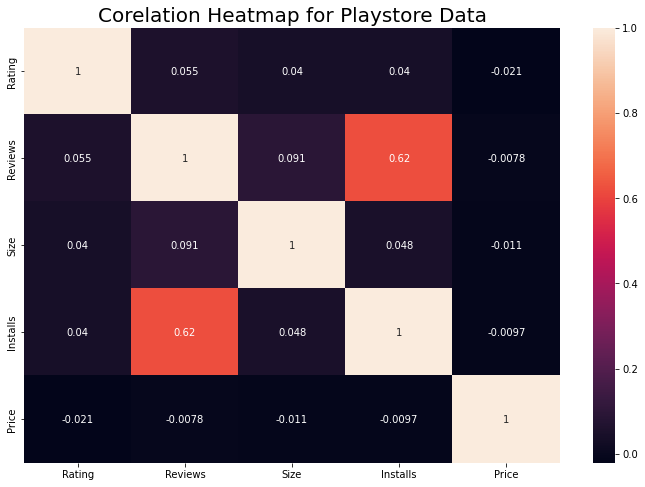

In [ ]:
#Correlation Heatmap Analysis for playstore data
plt.figure(figsize = (12,8))
sns.heatmap(df_app.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20);




*   There is a strong positive correlation between the Reviews and Installs column.

*   The Rating is slightly positively correlated with the Installs,Size and Reviews column.
*   The Price is slightly negatively correlated with the Rating, Reviews,Size and Installs.



## **Analyzing sentiments of customers.**

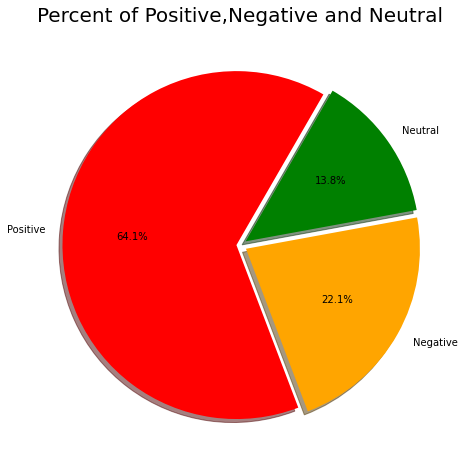

In [ ]:
#Visualising sentiments through Piechart
plt.figure(figsize=(12,8))
labels=df_review['Sentiment'].value_counts(sort=True).index
sizes=df_review['Sentiment'].value_counts(sort=True)
plt.pie(sizes,explode=(0.02,0.04,0.04),labels=labels,colors=["red","orange","green"],autopct='%1.1f%%',shadow=True,startangle=60)
plt.title('Percent of Positive,Negative and Neutral',size=20)
plt.show()

We can see that 64.1% of the user reviews are **Positive**,22.1% of the user reviews are **Negative** and 13.8% of the user reviews are **Neutral.**

## **CONCLUSION**

The Google Play Store Apps data provides some useful insights regarding the trends of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the plots shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs.Majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE).Talking about the reviews, we can see that 64.1% of the user reviews are Positive,22.1% of the user reviews are Negative and 13.8% of the user reviews are Neutral.  As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.